In [144]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import log_loss

%matplotlib inline
import tensorflow as tf
from tensorflow import keras

from sklearn.cross_validation import train_test_split

In [229]:
def noisy(original, s):
    Y = original.copy()
    list_index = list(range(len(Y.flatten())))
    for i in range(len(list_index)*s//100-1,-1,-1):
        a = list_index.pop(int(np.random.rand()*len(list_index)))
        Y[a//original.shape[0]][a%original.shape[1]] = (Y[a//original.shape[0]][a%original.shape[1]]+1)%2
    return Y.reshape(original.shape)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, 'gray')

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_lables[predicted_label],
                                100*np.max(predictions_array),
                                class_lables[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(5), predictions_array, color="#777777", tick_label=class_lables)
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [206]:
model = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(6,6)), 
    keras.layers.Dense(int((500)**0.5), activation="tanh"), 
    keras.layers.Dense(5, activation="softmax") 
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [207]:
x1 = np.array([[0,1,0,0,0,0],
               [0,1,0,0,0,0],
               [0,1,0,0,0,0],
               [0,1,0,0,0,0],
               [0,1,0,0,0,0],
               [0,1,1,1,1,0]])

x2 = np.array([[0,1,0,0,1,0],
               [0,1,0,0,1,0],
               [0,1,0,0,1,0],
               [0,1,0,0,1,0],
               [0,1,0,0,1,0],
               [0,1,1,1,1,0]])

x3 = np.array([[1,1,1,1,1,1],
               [0,0,1,1,0,0],
               [0,0,1,1,0,0],
               [0,0,1,1,0,0],
               [0,0,1,1,0,0],
               [0,0,1,1,0,0]])

x4 = np.array([[1,1,1,1,1,1],
               [1,0,0,0,0,1],
               [1,0,0,0,0,1],
               [1,0,0,0,0,1],
               [1,0,0,0,0,1],
               [1,1,1,1,1,1]])

x5 = np.array([[0,1,0,0,1,0],
               [0,1,0,1,0,0],
               [0,1,1,0,0,0],
               [0,1,1,0,0,0],
               [0,1,0,1,0,0],
               [0,1,0,0,1,0]])

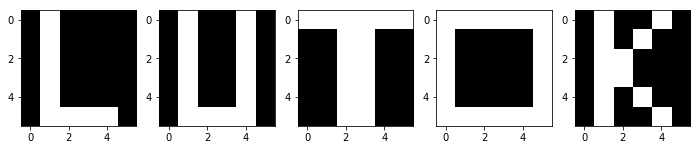

In [209]:
class_lables = ['L', 'U', 'T', 'O', 'K']

plt.figure(figsize=(12,12))
for i, x in enumerate((x1, x2, x3, x4, x5)) :
    plt.subplot(1,5,i+1)
    plt.imshow(x, 'gray')

In [245]:
samples = np.array(1000*[x1, x2, x3, x4, x5])
class_num = np.array(1000*[0, 1, 2, 3, 4], dtype=np.uint8)

samples_test = []
class_num_test = []
for j,x in enumerate([x1,x2,x3,x4,x5]):
    for i in range(100):
        samples_test.append(noisy(x,np.random.randint(0,20)))
        class_num_test.append(j)
samples_test = np.array(samples_test)
class_num_test = np.array(class_num_test, dtype=np.uint8)

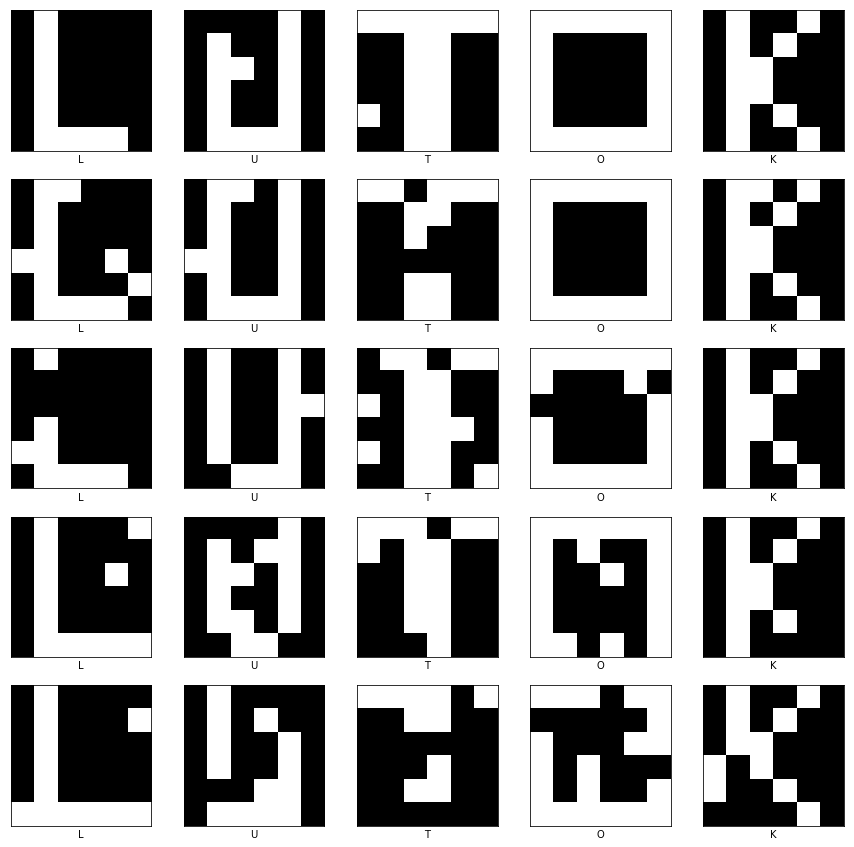

In [246]:
plt.figure(1, figsize=(15,15))
for a in range(5):
    for b in range(0,500,100):
        plt.subplot(5,5,5*a+b//100+1)
        plt.xticks([]); plt.yticks([])
        plt.grid(False)
        plt.imshow(samples_test[a+b], 'gray')
        plt.xlabel(class_lables[class_num_test[a+b]])

In [247]:
model.fit(samples, class_num, epochs=20)

Epoch 1/20
5000/5000 [==============================] - 0s 61us/step - loss: 4.6657e-04 - acc: 1.0000
Epoch 2/20
5000/5000 [==============================] - 0s 62us/step - loss: 4.1693e-04 - acc: 1.0000
Epoch 3/20
5000/5000 [==============================] - 0s 60us/step - loss: 3.7367e-04 - acc: 1.0000
Epoch 4/20
5000/5000 [==============================] - 0s 58us/step - loss: 3.3581e-04 - acc: 1.0000
Epoch 5/20
5000/5000 [==============================] - 0s 61us/step - loss: 3.0247e-04 - acc: 1.0000
Epoch 6/20
5000/5000 [==============================] - 0s 62us/step - loss: 2.7299e-04 - acc: 1.0000
Epoch 7/20
5000/5000 [==============================] - 0s 61us/step - loss: 2.4686e-04 - acc: 1.0000
Epoch 8/20
5000/5000 [==============================] - 0s 60us/step - loss: 2.2360e-04 - acc: 1.0000
Epoch 9/20
5000/5000 [==============================] - 0s 60us/step - loss: 2.0284e-04 - acc: 1.0000
Epoch 10/20
5000/5000 [==============================] - 0s 64us/step - loss: 1.84

In [248]:
test_loss, test_acc = model.evaluate(samples_test, class_num_test)
print('Test loss:', test_loss, 'Test accuracy:', test_acc)

500/500 [==============================] - 0s 40us/step
Test loss: 0.04866258244216442 Test accuracy: 0.984


In [249]:
predictions = model.predict(np.array(samples_test))

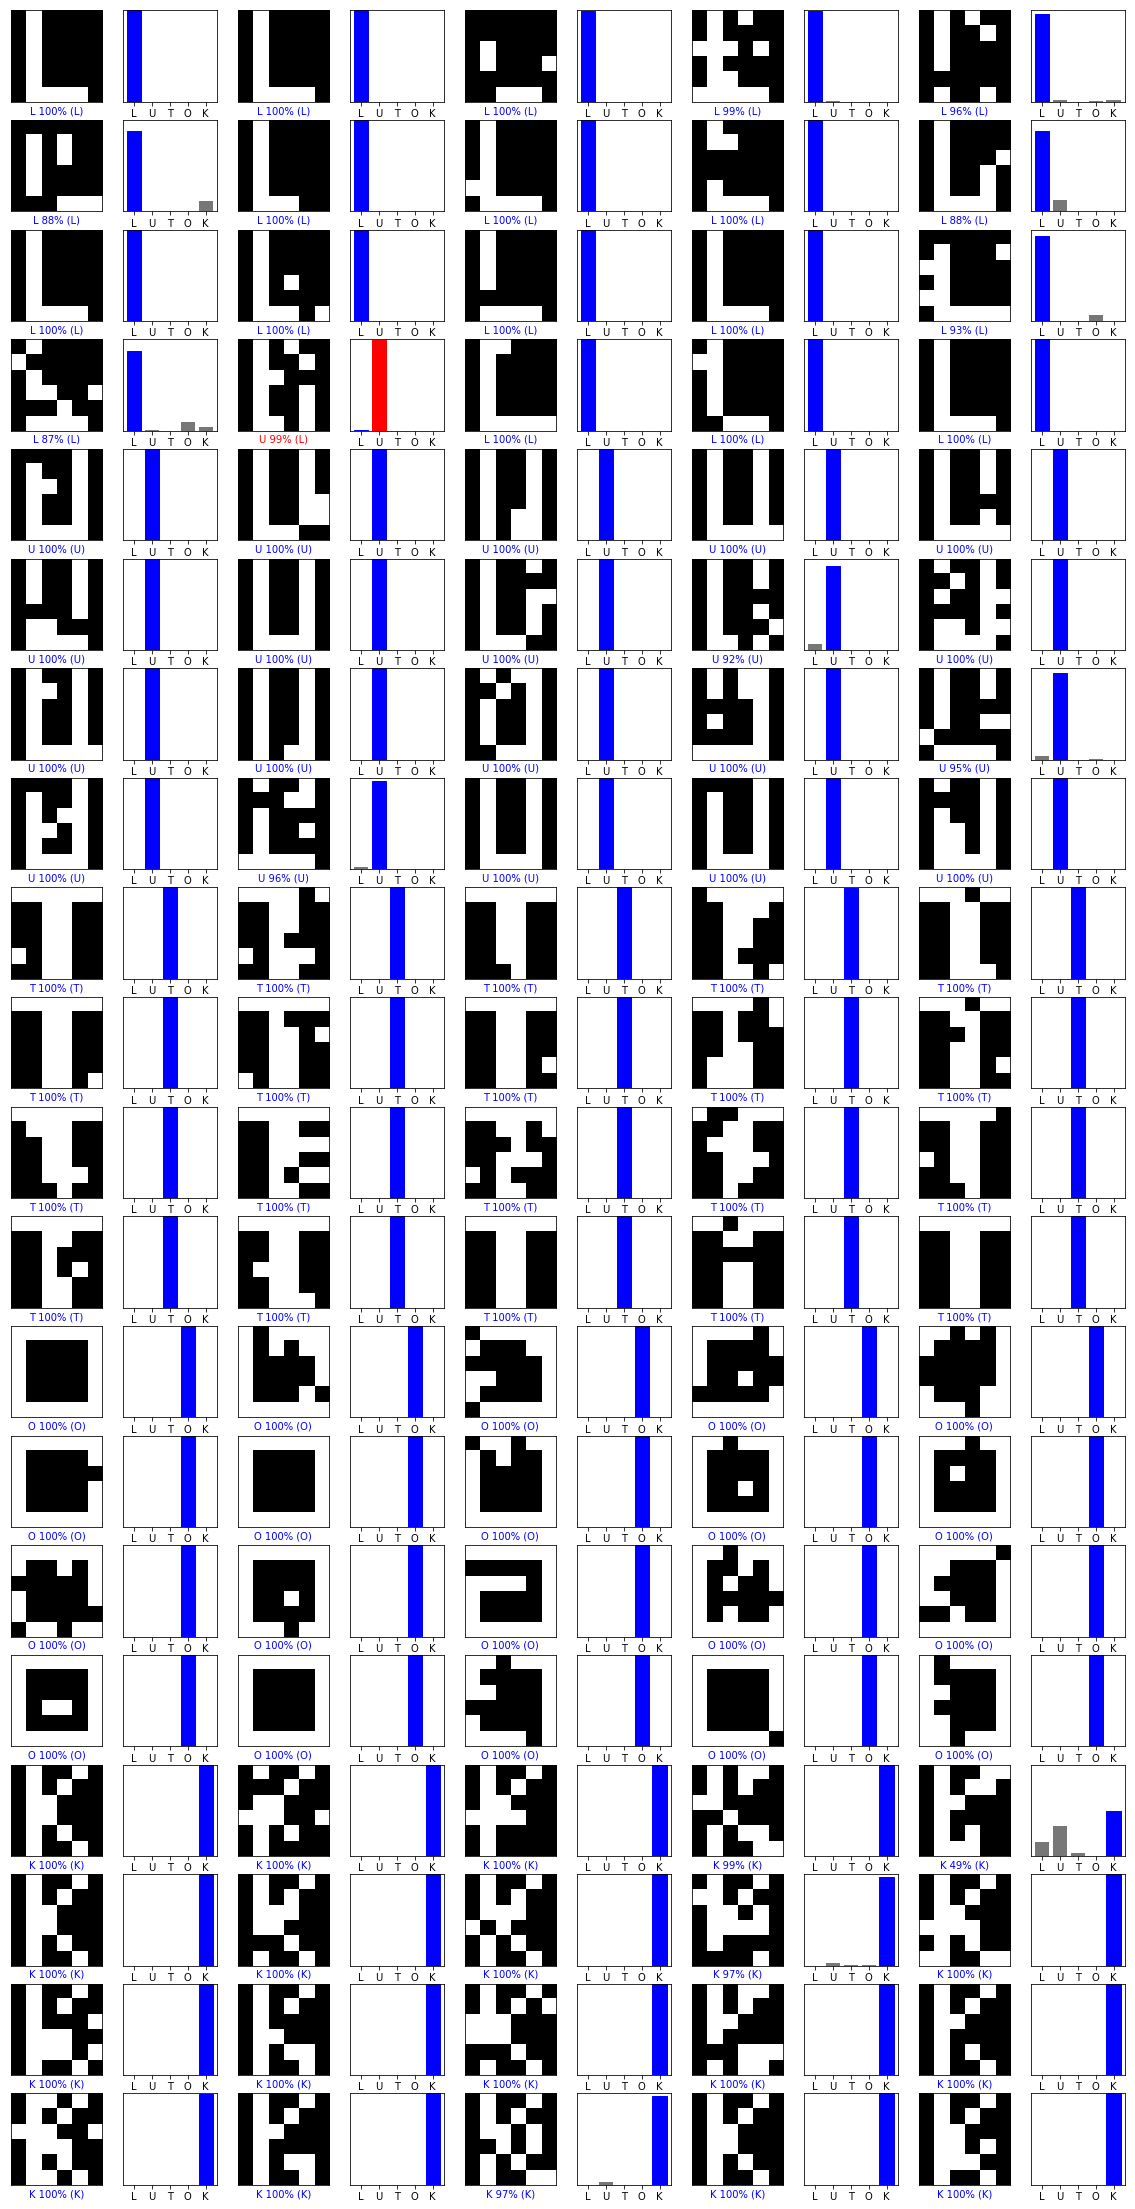

In [258]:
rows = 20
cols = 5
images = rows*cols
plt.figure(figsize=(2*2*cols,2*rows))
for i in range(images):
    plt.subplot(rows,2*cols,2*i+1)
    plot_image(5*i, predictions, class_num_test, np.array(samples_test))
    plt.subplot(rows,2*cols,2*i+2)
    plot_value_array(5*i, predictions, class_num_test)